In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import scipy.stats as stats
%matplotlib inline
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

0.90


In [3]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble

In [5]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

In [6]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),]
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [7]:
le = preprocessing.LabelEncoder()
scaler = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [8]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
train_data.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
test_data.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [11]:
print(train_data.dtypes.astype(str).value_counts())
for i in test_data:
  if test_data[i].isnull().sum():
    print(i,' ',test_data[i].dtype,' ',test_data[i].isnull().sum())

object     39
int64      34
float64     3
dtype: int64
MSZoning   object   4
LotFrontage   float64   227
Utilities   object   2
Exterior1st   object   1
Exterior2nd   object   1
MasVnrType   object   16
MasVnrArea   float64   15
BsmtQual   object   44
BsmtCond   object   45
BsmtExposure   object   44
BsmtFinType1   object   42
BsmtFinSF1   float64   1
BsmtFinType2   object   42
BsmtFinSF2   float64   1
BsmtUnfSF   float64   1
TotalBsmtSF   float64   1
BsmtFullBath   float64   2
BsmtHalfBath   float64   2
KitchenQual   object   1
Functional   object   2
FireplaceQu   object   730
GarageType   object   76
GarageYrBlt   float64   78
GarageFinish   object   78
GarageCars   float64   1
GarageArea   float64   1
GarageQual   object   78
GarageCond   object   78
SaleType   object   1


In [12]:
clear_train = pd.DataFrame()
null_train = pd.DataFrame()
clear_test = pd.DataFrame()
null_test = pd.DataFrame()
def clear_null():
  for i in train_data:
    if train_data[i].isnull().sum():
      #print(i,' ',train_data[i].dtype,' ',train_data[i].isnull().sum())
      null_train[i] = train_data[i]
    else:
      clear_train[i] = train_data[i]
    if i != 'SalePrice' and test_data[i].isnull().sum():
      null_test[i] = test_data[i]
    elif i != 'SalePrice' and test_data[i].isnull().sum() == 0:
      clear_test[i] = test_data[i]
  print(clear_train.shape)
  print(null_train.shape)
  print(clear_test.shape)
  print(null_test.shape)
clear_null()

(1460, 61)
(1460, 15)
(1459, 46)
(1459, 29)


In [13]:
def count_encoding(data):
  for i in data:
    if data[i].dtype == object:
      Mean_encoded_subject = data[i].value_counts().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      data[i] =  data[i].map(new_dict) 
  return data

In [14]:
clear_train.loc[clear_train['Exterior1st'] == clear_train['Exterior2nd'],'Exterior'] = 1
clear_train.loc[clear_train['Exterior1st'] != clear_train['Exterior2nd'],'Exterior'] = 2
clear_train.loc[clear_train['Condition1'] == clear_train['Condition2'],'Condition'] = 1
clear_train.loc[clear_train['Condition1'] != clear_train['Condition2'],'Condition'] = 2
clear_train = clear_train.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

clear_test.loc[clear_test['Condition1'] == clear_test['Condition2'],'Condition'] = 1
clear_test.loc[clear_test['Condition1'] != clear_test['Condition2'],'Condition'] = 2
clear_test = clear_test.drop(['Condition1','Condition2'],axis = 1)

In [15]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}


In [16]:
clear_train['Utilities'] = clear_train['Utilities'].map(utilities)

clear_train['HouseStyle'] = clear_train['HouseStyle'].map(housStyle)
clear_test['HouseStyle'] = clear_test['HouseStyle'].map(housStyle)

clear_train['ExterQual'] = clear_train['ExterQual'].map(extraq)
clear_test['ExterQual'] = clear_test['ExterQual'].map(extraq)

clear_train['ExterCond'] = clear_train['ExterCond'].map(extraq)
clear_test['ExterCond'] = clear_test['ExterCond'].map(extraq)

clear_train['HeatingQC'] = clear_train['HeatingQC'].map(extraq)
clear_test['HeatingQC'] = clear_test['HeatingQC'].map(extraq)

clear_test['Electrical'] = clear_test['Electrical'].map(elec)

clear_train['KitchenQual'] = clear_train['KitchenQual'].map(extraq)

In [17]:
print('clean train\n',clear_train.dtypes.astype(str).value_counts(),'\n')
print('clean test\n',clear_test.dtypes.astype(str).value_counts(),'\n')
print('null train\n',null_train.dtypes.astype(str).value_counts(),'\n')
print('null test\n',null_test.dtypes.astype(str).value_counts(),'\n')

clean train
 int64      39
object     17
float64     3
dtype: int64 

clean test
 int64      28
object     14
float64     3
dtype: int64 

null train
 object     12
float64     3
dtype: int64 

null test
 object     18
float64    11
dtype: int64 



In [18]:
null_train.select_dtypes(include=['float64'])

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

In [19]:
col_null_test = ['Utilities','Exterior1st','Exterior2nd','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','KitchenQual','FireplaceQu','GarageQual','GarageCond']
col_null_train = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageQual','GarageCond']

In [20]:
def null_train_test(logData,nullData,var):
  log_test = pd.DataFrame()
  log_train = pd.DataFrame()
  out_col = pd.DataFrame()
  logData[var] = nullData[var]
  null_row_list = list(logData[logData[var].isnull()].index.tolist())
  col = list(logData.columns)
  k = -1
  for j in null_row_list:
    try:
      k+=1 
      null_row_value = logData.iloc[j]
      null_row_value = list(null_row_value.values)
      for i in range(len(null_row_value)):
        log_test.loc[k,col[i]] = null_row_value[i]
    except:
      continue
  logData = logData.dropna()
  out_col[var] = logData[var]
  #print(log_test.shape)
  #logData = logData.drop([var],axis = 1)
  log_test = log_test.drop([var],axis = 1)
  
  return logData,log_test,null_row_list,out_col[var]

In [21]:
def training_cla(X_train,y_train,X_test,y_test):
  r = 0
  mod = RandomForestClassifier()
  for clf in classifiers:
      #print(X_train.shape,' ',y_train.shape,' ',X_test.shape)
      clf.fit(X_train, y_train)
      name = clf.__class__.__name__
      #print('\n',name,':')
      train_predictions = clf.predict(X_test)
      acc = accuracy_score(y_test, train_predictions)
      #print("Accuracy: {:.3%}".format(acc))
      if acc>r:
        r = acc
        mod = clf
      #train_predictions = clf.predict_proba(X_test)
      #ll = log_loss(y_test, train_predictions)
      #print("Log Loss: {}".format(ll))
      
      #log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
      #log = log.append(log_entry)
  return r,mod
def training_reg(X_train,y_train,X_test,y_test):
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  res = regressor.score(X_train, y_train)
  passref = PassiveAggressiveRegressor(max_iter=100000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
  passref.fit(X_train, y_train)
  res1 = passref.score(X_train, y_train)
  if res>res1:
    mod = LinearRegression()
  else:
    res = res1
    mod = PassiveAggressiveRegressor(max_iter=100000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
  return res, mod


In [22]:
def normReg(train,test,y):
  scaler.fit(train)
  train = scaler.transform(train)
  scaler.fit(test)
  test = scaler.transform(test)
  le.fit(y)
  y = le.transform(y)
  #scaler.fit(y)
  #y = scaler.transform(y)
  #scaler.fit(y1)
  #y1 = scaler.transform(y1)
  return train, test, y
def norm(train,test,y):
  scaler.fit(train)
  train = scaler.transform(train)
  scaler.fit(test)
  test = scaler.transform(test)
  le.fit(y)
  y = le.transform(y)
  #scaler.fit(y)
  #y = scaler.transform(y)
  #scaler.fit(y1)
  #y1 = scaler.transform(y1)
  return train, test, y
def norm_min_max(train,test,y):
  train = min_max_scaler.fit_transform(train)
  test = min_max_scaler.fit_transform(test)
  #y = min_max_scaler.fit_transform(y)
  #y1 = min_max_scaler.fit_transform(y1)
  le.fit(y)
  y = le.transform(y)
  return train, test, y
def norm_min_maxReg(train,test,y):
  train = min_max_scaler.fit_transform(train)
  test = min_max_scaler.fit_transform(test)
  #y = min_max_scaler.fit_transform(y)
  #y1 = min_max_scaler.fit_transform(y1)
  #le.fit(y)
  #y = le.transform(y)
  return train, test, y
#train,test,y,y1 = norm(null_train_data, null_train_data1, y, y1)
#train,test,y = norm(null_train_data, null_test_data, y)
#train,test,y,y1 = norm(null_train_data, null_train_data1, y, y1)

In [23]:
def replaceNan(clf,X_train, y_train,null_test_data,null_row_list,var,clear,null):
  clf.fit(X_train, y_train)
  
  train_predictions = clf.predict(null_test_data)
  #print('ok')
  #if var == 'GarageCond':
  #print(var)
  #print(train_predictions[0])
  train_predictions = le.inverse_transform(train_predictions)
  #if var == 'GarageCond':
  #print(train_predictions[0])
  clear[var] = null[var]
  for i in range(len(null_row_list)):
    try:
      clear.loc[null_row_list[i],var] = train_predictions[i]
    except:
      print('error')
  return clear
def replaceNanReg(clf,X_train, y_train,null_test_data,null_row_list,var,clear,null):
  clf.fit(X_train, y_train)
  train_predictions = clf.predict(null_test_data)
  #print(var,' ',train_predictions)
  #print(var)
  clear[var] = null[var]
  #print(clear[var].isnull().sum())
  for i in range(len(null_row_list)):
    try:
      clear.loc[null_row_list[i],var] = train_predictions[i]
    except:
      print('error')
  #print(clear[var].isnull().sum())
  return clear

In [24]:
all_output_col = pd.DataFrame()
for i in null_train:
  null_train_data, null_test_data, null_row_list,all_output_col[i] = null_train_test(clear_train, null_train,i)
  #null_train_data['BsmtQual'] = null_train_data['BsmtQual'].map(bstmq)
  y = null_train_data[i]
  null_train_data = null_train_data.drop([i],axis = 1)
  null_train_data = count_encoding(null_train_data)
  null_test_data = count_encoding(null_test_data)
  #null_train_data[i] = all_output_col[i]
  #print('Train\n',null_train_data.head(5))
  #print('Test\n',null_test_data1.head(5))
  #print(all_output_col.head(5))
  #print(null_train_data.head(2))
  #print(null_test_data.shape)
  #null_train_data = null_train_data.drop([i], axis = 1)
  if null_train[i].dtype == object:
    train,test,y = norm(null_train_data, null_test_data, y)
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)
    r,mod = training_cla(X_train,y_train,X_test,y_test)
    clear_train = replaceNan(mod,X_train, y_train,null_test_data,null_row_list,i,clear_train, null_train)
    #print(i)
    #print("Accuracy: {:.3%}".format(r))
    null_train = null_train.drop([i],axis = 1)
    #null_train_data, null_test_data, null_row_list,all_output_col = null_train_test(clear_test, null_test,'Utilities')
  else:
    train,test,y = norm_min_maxReg(null_train_data, null_test_data, y)
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)
    r,mod = training_reg(X_train,y_train,X_test,y_test)
    clear_train = replaceNanReg(mod,X_train, y_train,null_test_data,null_row_list,i,clear_train, null_train)
    print(i,' ',clear_train[i].isnull().sum())
    #print(i)
    #print("Accuracy: {:.3%}".format(r))
    null_train = null_train.drop([i],axis = 1)
    #null_train_data, null_test_data, null_row_list,all_output_col = null_train_test(clear_test, null_test,'Utilities')
print(clear_train.shape)

LotFrontage   0
MasVnrArea   0
GarageYrBlt   0
(1460, 74)


In [25]:
#print('Test Data')
all_output_col1 = pd.DataFrame()
null_test = null_test.drop(['Utilities'],axis = 1)
for i in null_test:
  if i != 'Utilities': 
    #Utilities GarageCond
    #print(i)
    null_train_data1, null_test_data1, null_row_list1,all_output_col1[i] = null_train_test(clear_test, null_test,i)
    #print('Train\n',null_train_data1.head(5))
    #print('Test\n',null_test_data1.head(5))
    #print(all_output_col1.head(5))
    #null_train_data['BsmtQual'] = null_train_data['BsmtQual'].map(bstmq)
    y = null_train_data1[i]
    null_train_data1 = null_train_data1.drop([i], axis = 1)
    null_train_data1 = count_encoding(null_train_data1)
    null_test_data1 = count_encoding(null_test_data1)
    #print('Train\n',null_train_data1.head(5))
    #null_train_data1[i] = all_output_col1[i]
    #print(null_train_data1.head(5),'\n',null_test_data1.head(5),'\n',y.head(5),'\n')
    if null_test[i].dtype == object:
      train,test,y = norm(null_train_data1, null_test_data1, y)
      #print(train.shape,' ',test.shape,' ',y.shape)
      X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)
      r,mod = training_cla(X_train,y_train,X_test,y_test)
      #print(null_test_data1.shape)
      #print(i)
      #print("Accuracy: {:.3%}".format(r))
      #print(null_test_data1)
      clear_test = replaceNan(mod,X_train, y_train,null_test_data1,null_row_list1,i,clear_test, null_test)
      null_test = null_test.drop([i],axis = 1)
    else:
      #print(i,' ',null_test[i].dtype)
      train,test,y = norm_min_maxReg(null_train_data1, null_test_data1, y)
      #print(train.shape,' ',test.shape,' ',y.shape)
      X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)
      r,mod = training_reg(X_train,y_train,X_test,y_test)
      #print(i,'\n',null_test_data1.head(5))
      #print(i)
      #print("Accuracy: {:.3%}".format(r))
      #print(null_test_data1)
      clear_test = replaceNanReg(mod,X_train, y_train,null_test_data1,null_row_list1,i,clear_test, null_test)
      print(i,' ',clear_test[i].isnull().sum())
      null_test = null_test.drop([i],axis = 1)
print(clear_test.shape)

LotFrontage   0
MasVnrArea   0
BsmtFinSF1   0
BsmtFinSF2   0
BsmtUnfSF   0
TotalBsmtSF   0
BsmtFullBath   0
BsmtHalfBath   0
GarageYrBlt   0
GarageCars   0
GarageArea   0
(1459, 73)


In [26]:
clear_test['Utilities'] = test_data['Utilities']
modE = clear_test['Utilities'].mode()
clear_test['Utilities'] = clear_test['Utilities'].fillna(modE[0])

In [27]:
#Train Data
clear_train['BsmtQual'] = clear_train['BsmtQual'].map(bstmq)
clear_train['BsmtCond'] = clear_train['BsmtCond'].map(bstmq)
clear_train['FireplaceQu'] = clear_train['FireplaceQu'].map(bstmq)
clear_train['BsmtExposure'] = clear_train['BsmtExposure'].map(bstmexp)
clear_train['BsmtFinType1'] = clear_train['BsmtFinType1'].map(bstmt1)
clear_train['BsmtFinType2'] = clear_train['BsmtFinType2'].map(bstmt1)
clear_train['Electrical'] = clear_train['Electrical'].map(elec)
clear_train['GarageQual'] = clear_train['GarageQual'].map(bstmq)
clear_train['GarageCond'] = clear_train['GarageCond'].map(bstmq)
clear_train = count_encoding(clear_train)

#Test Data
clear_test.loc[clear_test['Exterior1st'] == clear_test['Exterior2nd'],'Exterior'] = 1
clear_test.loc[clear_test['Exterior1st'] != clear_test['Exterior2nd'],'Exterior'] = 2
clear_test['BsmtQual'] = clear_test['BsmtQual'].map(bstmq)
clear_test['BsmtCond'] = clear_test['BsmtCond'].map(bstmq)
clear_test['BsmtExposure'] = clear_test['BsmtExposure'].map(bstmexp)
clear_test['BsmtFinType1'] = clear_test['BsmtFinType1'].map(bstmt1)
clear_test['BsmtFinType2'] = clear_test['BsmtFinType2'].map(bstmt1)
clear_test['FireplaceQu'] = clear_test['FireplaceQu'].map(bstmq)
clear_test['GarageQual'] = clear_test['GarageQual'].map(bstmq)
clear_test['GarageCond'] = clear_test['GarageCond'].map(bstmq)
clear_test = count_encoding(clear_test)


In [28]:
lii = ['YearBuilt','YearRemodAdd','YrSold','MoSold','GarageYrBlt']
#lii = ['GarageYrBlt','YearBuilt','YearRemodAdd']
for i in lii:
  Mean_encoded_subject = clear_train.groupby([i])['SalePrice'].mean().to_dict()
  sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
  li = list(sorted_d)
  new_dict = {}
  for J in li:
    new_dict[J] = li.index(J)+1
  clear_train[i] =  clear_train[i].map(new_dict)
  clear_test[i] =  clear_test[i].map(new_dict)

In [29]:
modE1 = clear_test['YearBuilt'].mode()
modE2 = clear_test['YearRemodAdd'].mode()
modE3 = clear_test['YrSold'].mode()
modE4 = clear_test['MoSold'].mode()
modE5 = clear_test['GarageYrBlt'].mode()
clear_test['YearBuilt'] = clear_test['YearBuilt'].fillna(modE1[0])
clear_test['YearRemodAdd'] = clear_test['YearRemodAdd'].fillna(modE2[0])
clear_test['YrSold'] = clear_test['YrSold'].fillna(modE3[0])
clear_test['MoSold'] = clear_test['MoSold'].fillna(modE4[0])
clear_test['GarageYrBlt'] = clear_test['GarageYrBlt'].fillna(modE5[0])

In [30]:
clear_train= clear_train.astype('float64')
clear_test= clear_test.astype('float64')

In [31]:
ab = clear_train['LotFrontage']
ab = np.log(ab+1)
ab.isnull().sum()

259

In [32]:
y = clear_train['SalePrice']

In [33]:
#s_copy = s.copy()
clear_train_copy = clear_train.copy()
clear_test_copy = clear_test.copy()
clear_train_copy1 = clear_train.copy()
clear_test_copy1 = clear_test.copy()

In [174]:
clear_train = clear_train_copy.copy()
clear_test = clear_test_copy.copy()

In [175]:
train_log_data = pd.DataFrame()
test_log_data = pd.DataFrame()
train_rec_data = pd.DataFrame()
test_rec_data = pd.DataFrame()
train_sqr_data = pd.DataFrame()
test_sqr_data = pd.DataFrame()
train_exp_data = pd.DataFrame()
test_exp_data = pd.DataFrame()
train_box_data = pd.DataFrame()
test_box_data = pd.DataFrame()
def transform(data,ttype,var):
  if ttype == 'Log':
    data[var] = np.log(data[var]+1)
  elif ttype == 'Rec':
    data[var] = 1/(data[var]+1)
  elif ttype == 'Sqr':
    data[var] = (data[var]+1)**(1/2)
  elif ttype == 'Exp':
    data[var] = 1/(data[var]+1)**(1/5)
  elif ttype == 'Box':
    #print(data[var])
    data[var],l = stats.boxcox(data[var]+1)
  return data[var]

for i in clear_train:
  train_log_data[i] = transform(clear_train,'Log',i)
  if i != 'SalePrice':
    train_rec_data[i] = transform(clear_train,'Rec',i)
  train_sqr_data[i] = transform(clear_train,'Sqr',i)
  train_exp_data[i] = transform(clear_train,'Exp',i)
  if i != 'SalePrice':
    #print(i)
    train_box_data[i] = transform(clear_train,'Box',i)
    
for i in clear_test:
  #print(i)
  if i != 'Utilities':
    test_log_data[i] = transform(clear_test,'Log',i)
    test_rec_data[i] = transform(clear_test,'Rec',i)
    test_sqr_data[i] = transform(clear_test,'Sqr',i)
    test_exp_data[i] = transform(clear_test,'Exp',i)
    test_box_data[i] = transform(clear_test,'Box',i)
  

In [ ]:
clear_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   Street         1459 non-null   float64
 3   LotShape       1459 non-null   float64
 4   LandContour    1459 non-null   float64
 5   LotConfig      1459 non-null   float64
 6   LandSlope      1459 non-null   float64
 7   Neighborhood   1459 non-null   float64
 8   BldgType       1459 non-null   float64
 9   HouseStyle     1459 non-null   float64
 10  OverallQual    1459 non-null   float64
 11  OverallCond    1459 non-null   float64
 12  YearBuilt      1459 non-null   float64
 13  YearRemodAdd   1459 non-null   float64
 14  RoofStyle      1459 non-null   float64
 15  RoofMatl       1459 non-null   float64
 16  ExterQual      1459 non-null   float64
 17  ExterCond      1459 non-null   float64
 18  Foundati

In [176]:
for i in test_log_data:
  modd = test_log_data[i].mode()
  test_log_data[i] = test_log_data[i].fillna(modd[0])
  modd = test_rec_data[i].mode()
  test_rec_data[i] = test_rec_data[i].fillna(modd[0])
  modd = test_sqr_data[i].mode()
  test_sqr_data[i] = test_sqr_data[i].fillna(modd[0])
  modd = test_exp_data[i].mode()
  test_exp_data[i] = test_exp_data[i].fillna(modd[0])
  modd = test_box_data[i].mode()
  test_box_data[i] = test_box_data[i].fillna(modd[0])

In [177]:
for i in train_log_data:
  if i != 'SalePrice':
    modd = train_log_data[i].mode()
    train_log_data[i] = train_log_data[i].fillna(modd[0])
    modd = train_rec_data[i].mode()
    train_rec_data[i] = train_rec_data[i].fillna(modd[0])
    modd = train_sqr_data[i].mode()
    train_sqr_data[i] = train_sqr_data[i].fillna(modd[0])
    modd = train_exp_data[i].mode()
    train_exp_data[i] = train_exp_data[i].fillna(modd[0])
    modd = train_box_data[i].mode()
    train_box_data[i] = train_box_data[i].fillna(modd[0])

In [178]:
y_c = y.copy()
y_c,lemda = stats.boxcox(y_c+1)
y_c

array([7.93227473, 7.87793334, 7.95927945, ..., 8.02703602, 7.78068604,
       7.7955657 ])

In [ ]:
'''
y = null_train_data['BsmtQual']
y1 = null_train_data1['BsmtQual']
#y = np.asarray(y)
#y = y.reshape(-1,1)
#y1 = np.asarray(y1)
#y1 = y1.reshape(-1,1)
null_train_data = null_train_data.drop(['BsmtQual'], axis = 1)
null_train_data1 = null_train_data1.drop(['BsmtQual'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)

#sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

#sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
train_predictions = clf.predict(null_test_data)
train_predictions = le.inverse_transform(train_predictions)
print(train_predictions)

temp = pd.DataFrame()
temp = clear_train

for i in range(len(null_row_list)):
  temp.loc[null_row_list[i],'BsmtQual'] = train_predictions[i]
'''

'\ny = null_train_data[\'BsmtQual\']\ny1 = null_train_data1[\'BsmtQual\']\n#y = np.asarray(y)\n#y = y.reshape(-1,1)\n#y1 = np.asarray(y1)\n#y1 = y1.reshape(-1,1)\nnull_train_data = null_train_data.drop([\'BsmtQual\'], axis = 1)\nnull_train_data1 = null_train_data1.drop([\'BsmtQual\'], axis = 1)\n\nX_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=1)\n\n#sns.set_color_codes("muted")\nsns.barplot(x=\'Accuracy\', y=\'Classifier\', data=log, color="g")\n\nplt.xlabel(\'Accuracy %\')\nplt.title(\'Classifier Accuracy\')\nplt.show()\n\n#sns.set_color_codes("muted")\nsns.barplot(x=\'Log Loss\', y=\'Classifier\', data=log, color="r")\n\nplt.xlabel(\'Log Loss\')\nplt.title(\'Classifier Log Loss\')\nplt.show()\n\nclf = RandomForestClassifier()\nclf.fit(X_train, y_train)\ntrain_predictions = clf.predict(null_test_data)\ntrain_predictions = le.inverse_transform(train_predictions)\nprint(train_predictions)\n\ntemp = pd.DataFrame()\ntemp = clear_train\n\nfor i i

In [ ]:
train_log_data.shape

(1460, 74)

In [197]:
train_log_data['SalePrice'] = train_data['SalePrice']
train_exp_data['SalePrice'] = train_data['SalePrice']
train_sqr_data['SalePrice'] = train_data['SalePrice']
train_box_data['SalePrice'] = train_data['SalePrice']

In [195]:
train_log_data['SalePrice'] = np.log(train_data['SalePrice'])
train_exp_data['SalePrice'] = np.exp(train_data['SalePrice'])

In [199]:
train_log_data

MSSubClass  MSZoning   LotArea  ...  GarageFinish  GarageQual  GarageCond
0       4.110874  1.791759  9.042040  ...      0.693147    1.098612    1.098612
1       3.044522  1.791759  9.169623  ...      0.693147    1.098612    1.098612
2       4.110874  1.791759  9.328212  ...      0.693147    1.098612    1.098612
3       4.262680  1.791759  9.164401  ...      1.386294    1.098612    1.098612
4       4.110874  1.791759  9.565284  ...      0.693147    1.098612    1.098612
...          ...       ...       ...  ...           ...         ...         ...
1455    4.110874  1.791759  8.976894  ...      0.693147    1.098612    1.098612
1456    3.044522  1.791759  9.486152  ...      1.386294    1.098612    1.098612
1457    4.262680  1.791759  9.109746  ...      0.693147    1.098612    1.098612
1458    3.044522  1.791759  9.181735  ...      1.386294    1.098612    1.098612
1459    3.044522  1.791759  9.204121  ...      1.098612    1.098612    1.098612

[1460 rows x 74 columns]

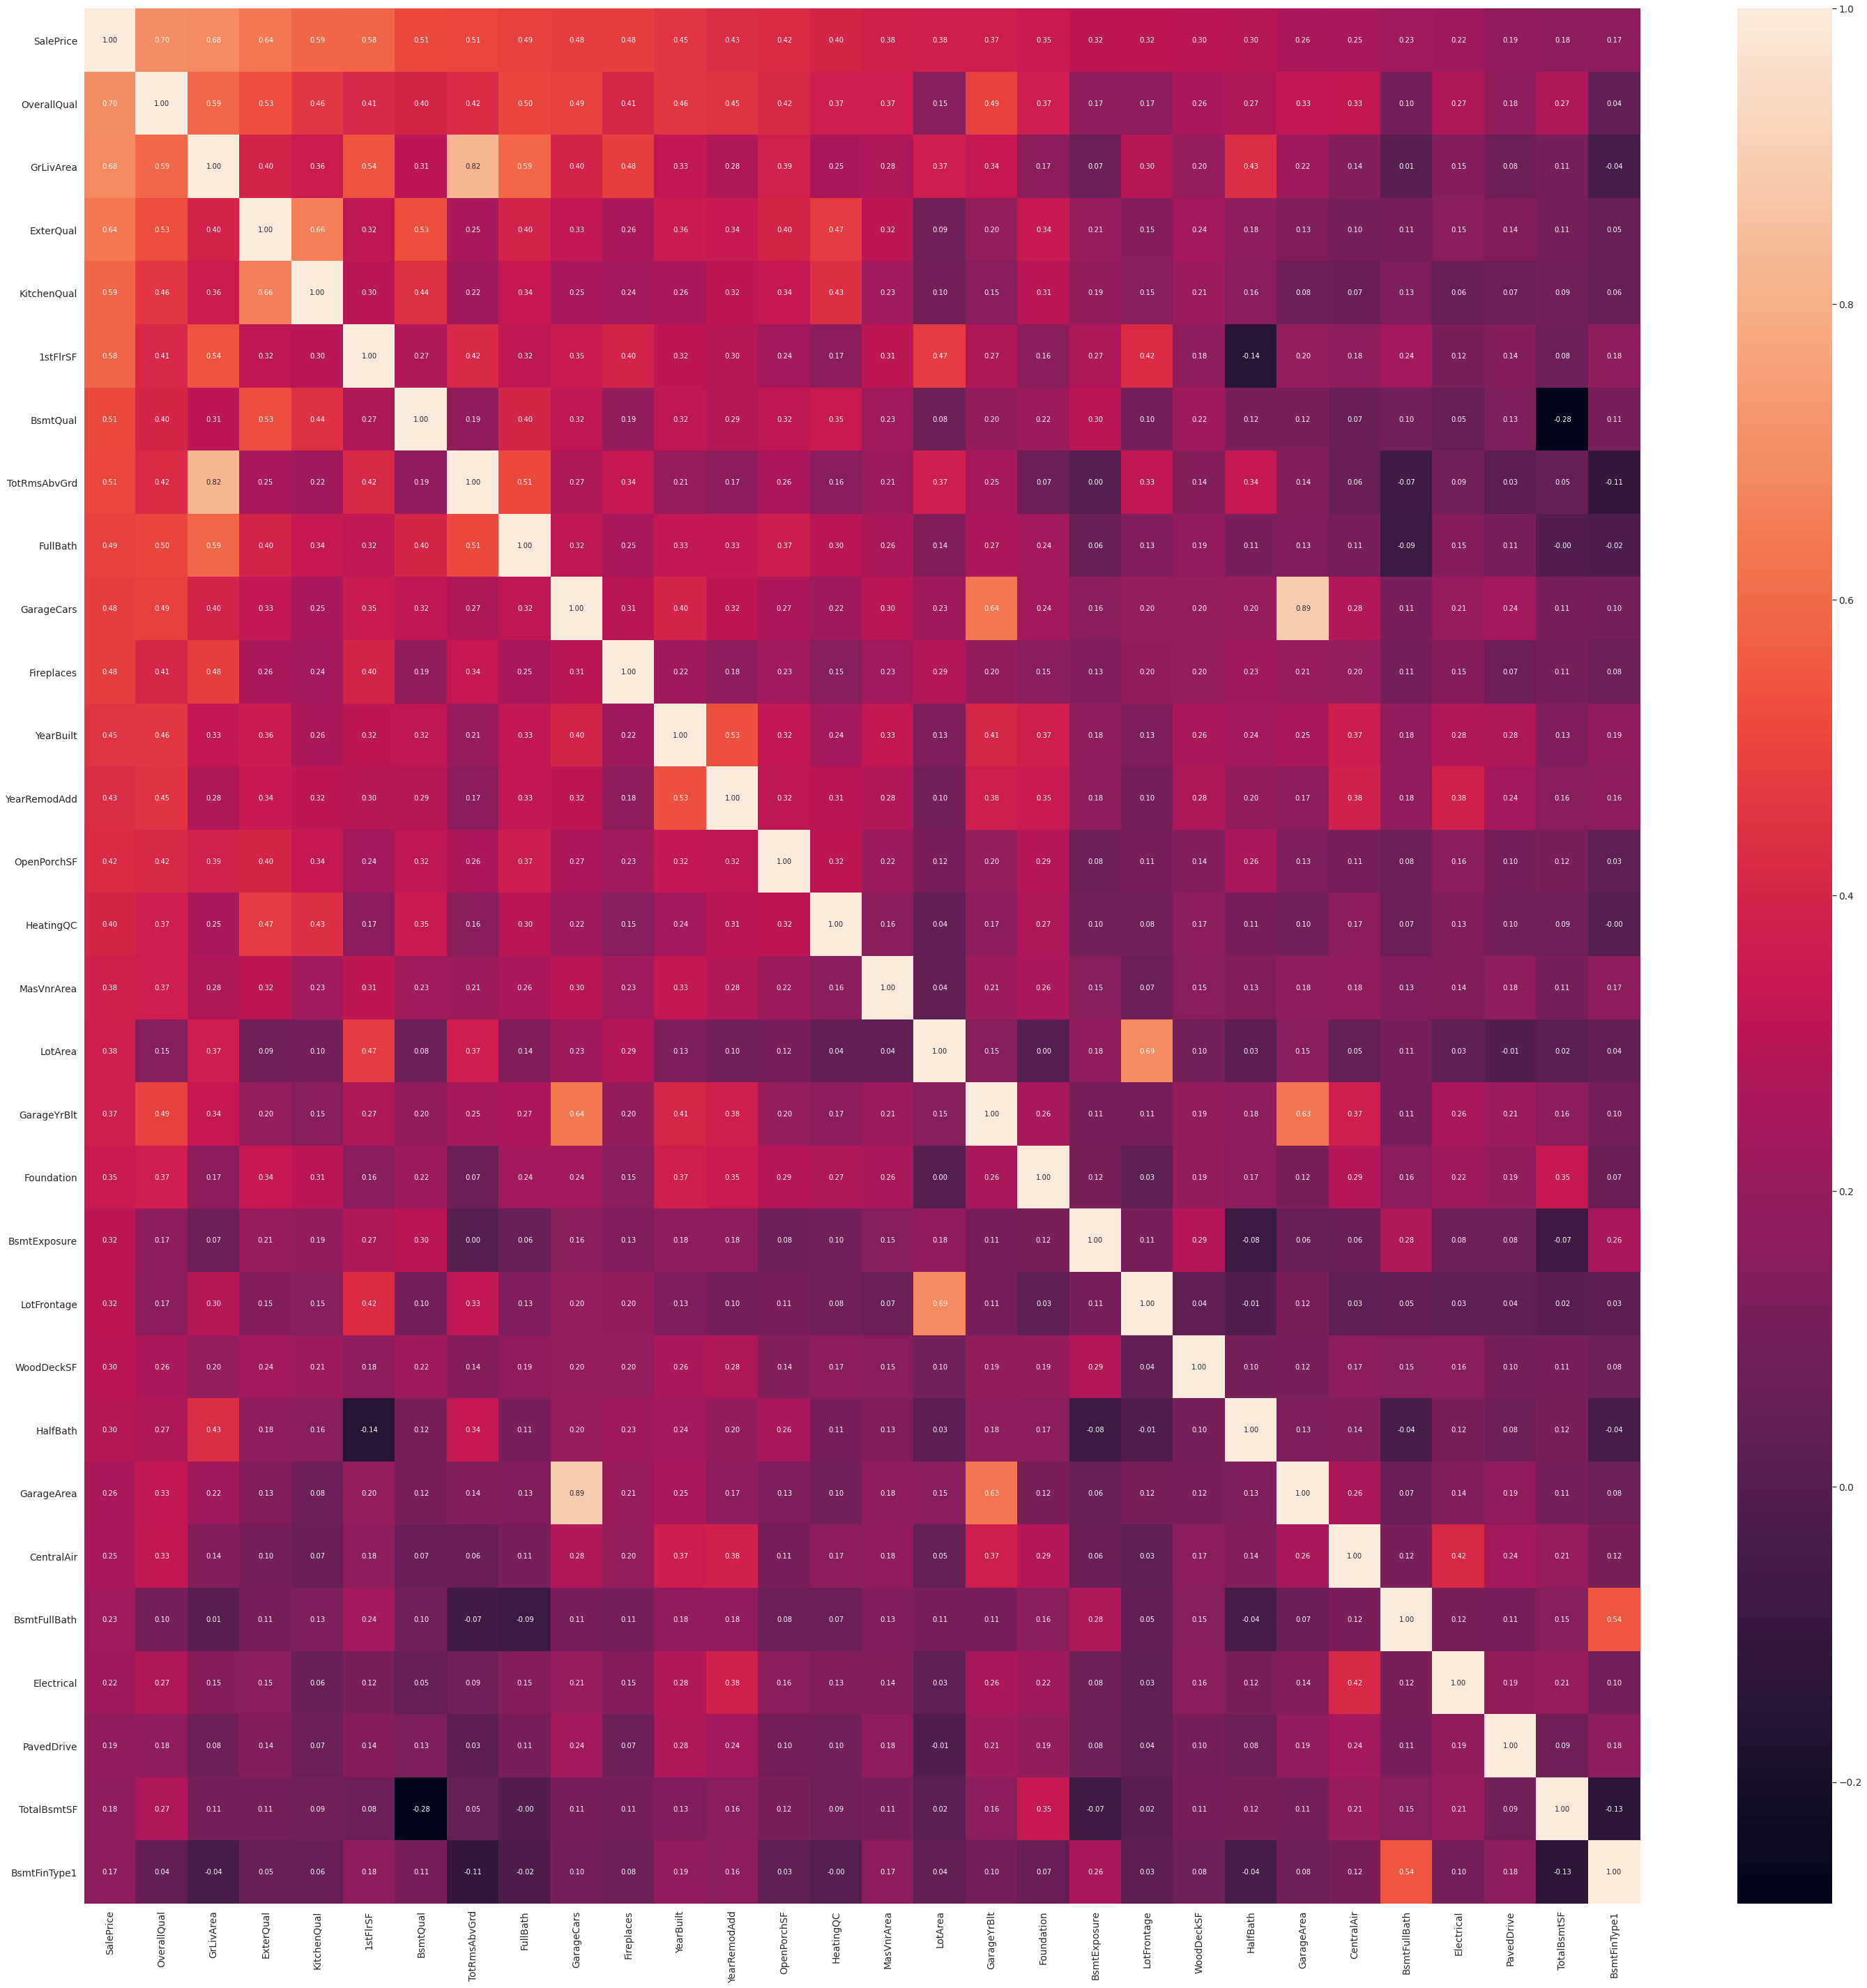

In [198]:
f,ax = plt.subplots(figsize=(50, 50))
corrmat = train_exp_data.corr()
k =30
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_exp_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
train_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  BldgType       1460 non-null   float64
 11  HouseStyle     1460 non-null   float64
 12  OverallQual    1460 non-null   float64
 13  OverallCond    1460 non-null   float64
 14  YearBuilt      1460 non-null   float64
 15  YearRemodAdd   1460 non-null   float64
 16  RoofStyle      1460 non-null   float64
 17  RoofMatl       1460 non-null   float64
 18  ExterQua

In [ ]:
# feature selection
def select_features(X, Y, func):
  bestfeatures = SelectKBest(score_func=func, k='all')
  fit = bestfeatures.fit(X,Y)
	#fs = SelectKBest(score_func=func, k='all')
	#fs.fit(X_train, y_train)
	#X_train_fs = fs.transform(X_train)
	#X_test_fs = fs.transform(X_test)
	#return X_train_fs, X_test_fs, fs
  return fit

# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, chi2)
fit = select_features(train_log_data, train_log_data['SalePrice'], mutual_info_regression)
#fit1 = select_features(train_log_data, train_log_data['SalePrice'], chi2)
fit2 = select_features(train_log_data, train_log_data['SalePrice'], f_regression)
#fit = select_features(x_input1, y_input, chi2)
#fit = select_features(x_input1, y_input, f_regression)
# what are scores for the features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_log_data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
#print(featureScores.nlargest(20,'Score'))
dfscores2 = pd.DataFrame(fit2.scores_)
dfcolumns2 = pd.DataFrame(train_log_data.columns)
featureScores2 = pd.concat([dfcolumns2,dfscores2],axis=1)
featureScores2.columns = ['Specs','Score'] 
#for i in range(len(fit.scores_)):
	#print('Feature %d: %f' % (x_input1.loc[i], fs.scores_[i]))
# plot the scores
#pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
#pyplot.show()

In [ ]:
a = featureScores.nlargest(20,'Score')
b = featureScores2.nlargest(20,'Score')
c = list(cols)
a = list(a['Specs'])
b = list(b['Specs'])
abc = a+b+c
#abc = set(abc)
print(len(abc),'\n',abc)
#print(featureScores.nlargest(20,'Score'))
#print(featureScores2.nlargest(20,'Score'))
#print(type(a),' ',type(b))
#print(a['Specs'])

60 
 ['SalePrice', 'OverallQual', 'Neighborhood', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageArea', 'KitchenQual', 'ExterQual', '1stFlrSF', 'YearRemodAdd', 'BsmtQual', 'MSSubClass', 'FullBath', 'TotRmsAbvGrd', '2ndFlrSF', 'Foundation', 'LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'GarageYrBlt', '1stFlrSF', 'ExterQual', 'FullBath', 'YearRemodAdd', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtQual', 'OpenPorchSF', 'GarageArea', 'Foundation', 'HeatingQC', 'LotArea', 'TotalBsmtSF', 'MasVnrType', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'GarageYrBlt', '1stFlrSF', 'ExterQual', 'FullBath', 'YearRemodAdd', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtQual', 'OpenPorchSF', 'GarageArea', 'Foundation', 'HeatingQC', 'LotArea', 'TotalBsmtSF']


In [ ]:
tx = train_log_data.drop(['SalePrice'],axis = 1)
ty = train_log_data['SalePrice']

The mean squared error (MSE) on test set: 0.0258


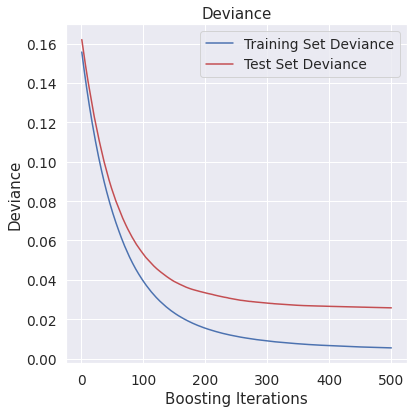

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tx, ty, test_size=0.2, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

'\nresult = permutation_importance(reg, X_test, y_test, n_repeats=10,\n                                random_state=42, n_jobs=2)\nsorted_idx = result.importances_mean.argsort()\nplt.subplot(1, 2, 2)\nplt.boxplot(result.importances[sorted_idx].T,vert=False, labels=np.array(tx.columns)[sorted_idx])\nplt.title("Permutation Importance (test set)")\nfig.tight_layout()\nplt.show() '

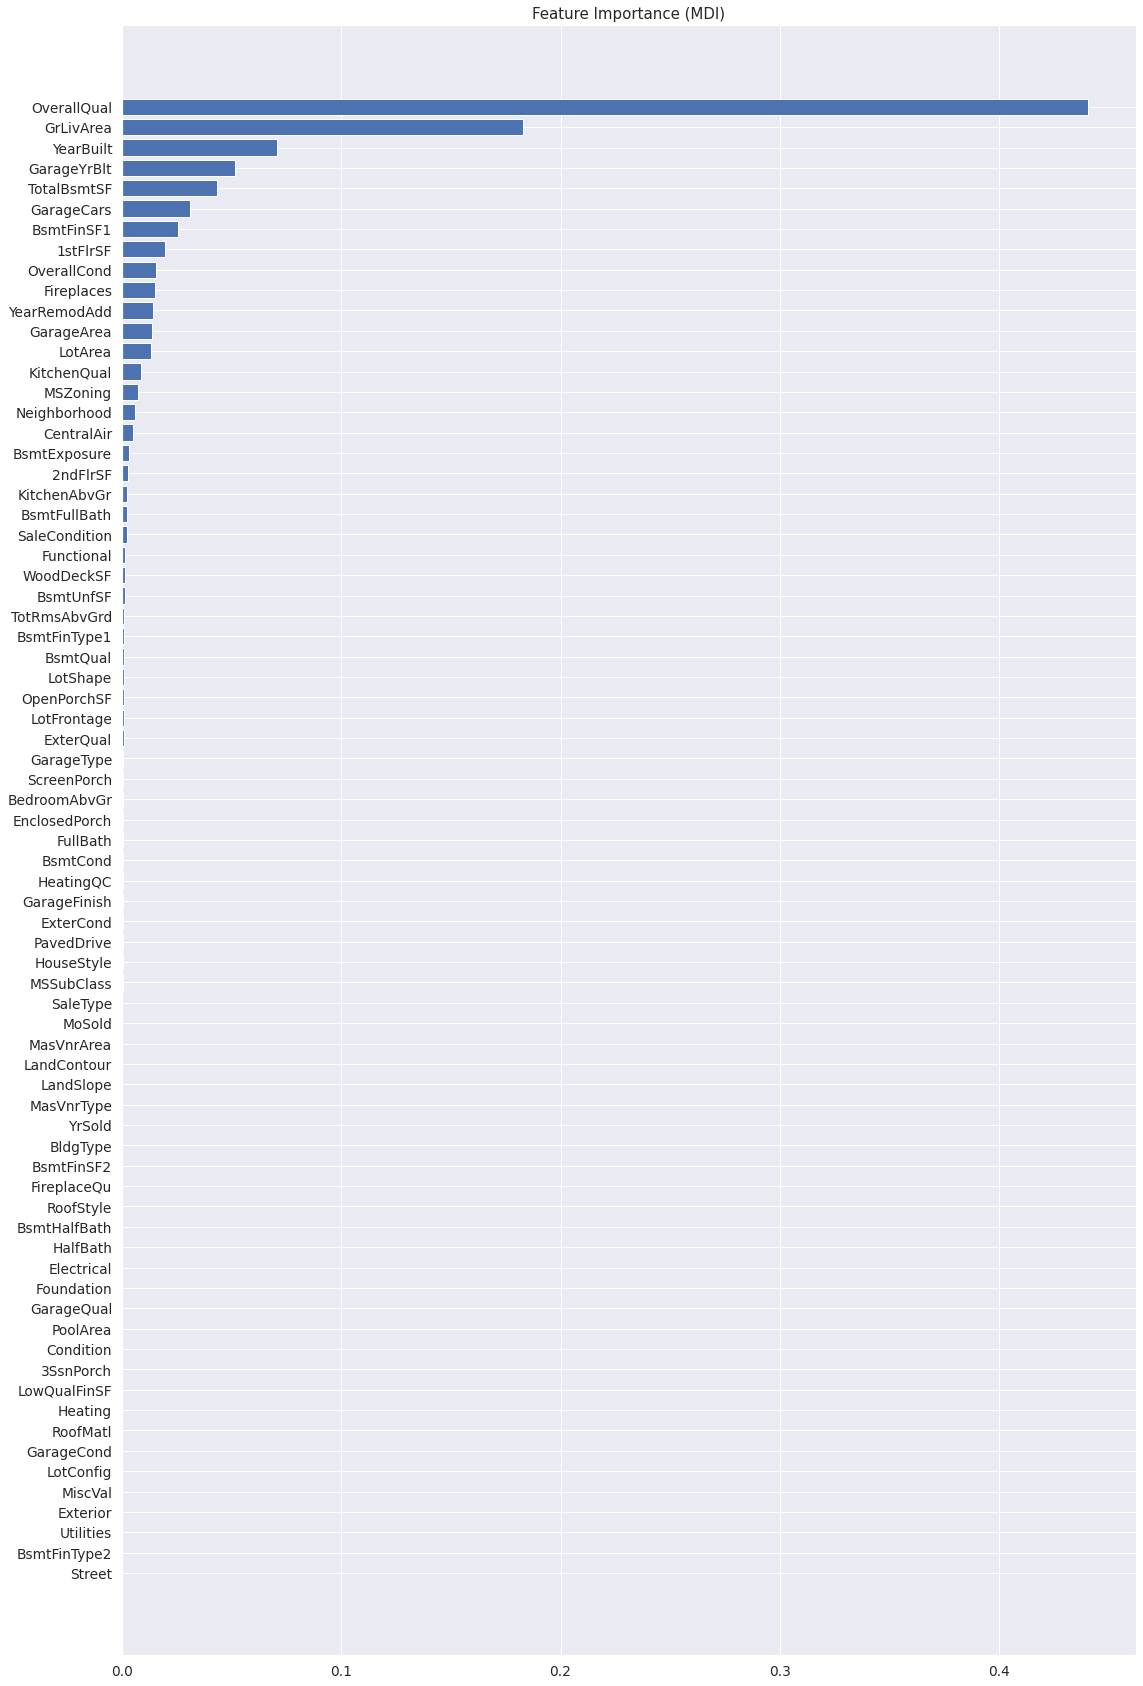

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos)
#print(np.array(tx.columns)[sorted_idx])
fig = plt.figure(figsize=(40, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(tx.columns)[sorted_idx])
aa = (pos, np.array(tx.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
'''
result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,vert=False, labels=np.array(tx.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show() '''

In [ ]:
#c = 0
for i in range((len(aa[1])-1),52,-1):
  #print(aa[1][i])
  abc.append(aa[1][i])
  #c+=1

In [ ]:
abc = set(abc)
print(len(abc),'\n',abc)
abc = list(abc)
#print(len(abc),'\n',abc)

30 
 {'BsmtExposure', 'YearRemodAdd', 'GarageYrBlt', 'GarageCars', 'MasVnrType', 'FullBath', 'CentralAir', 'SalePrice', 'Neighborhood', 'MSSubClass', 'HeatingQC', 'BsmtQual', 'OverallCond', 'KitchenAbvGr', 'OpenPorchSF', '1stFlrSF', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'TotRmsAbvGrd', 'GrLivArea', 'ExterQual', 'OverallQual', 'Fireplaces', 'KitchenQual', 'MSZoning', 'Foundation', 'YearBuilt'}


In [ ]:
new_abc = abc.copy()
new_abc.remove('SalePrice')

In [200]:
train_log_data = train_log_data.filter(cols,axis = 1)

In [ ]:
final_train_Logdata = train_log_data.filter(abc,axis = 1)
final_test_Logdata = test_log_data.filter(new_abc,axis = 1)

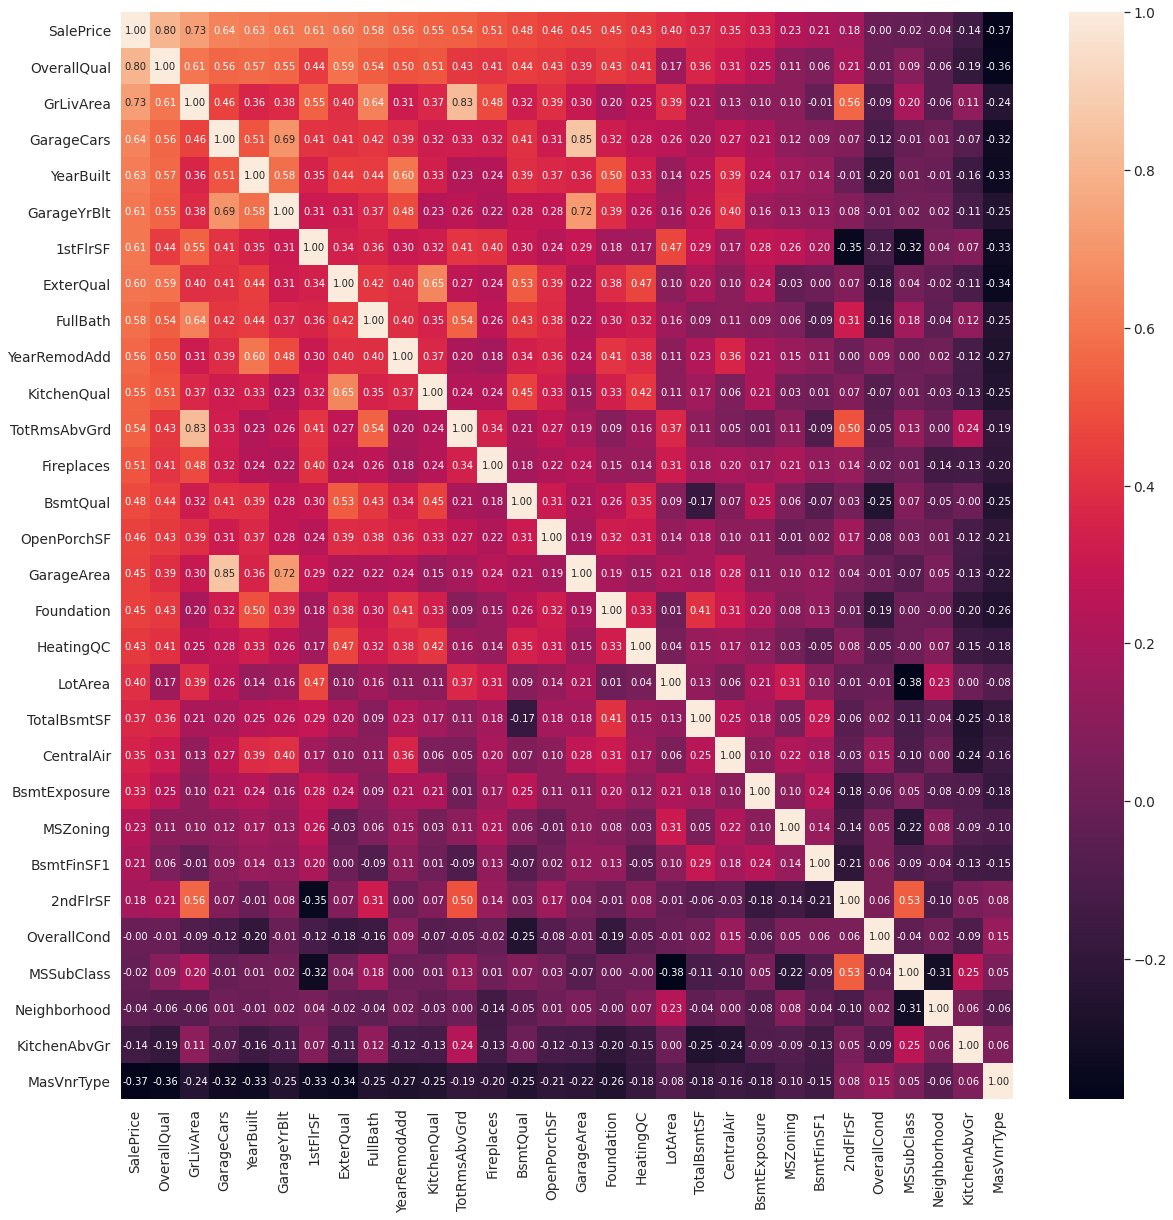

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
corrmat = final_train_Logdata.corr()
k =30
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(final_train_Logdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
rmv_col = ['CentralAir','MSZoning','MasVnrType','ExterQual','OverallQual','KitchenQual','BsmtQual','OverallCond','KitchenAbvGr','TotRmsAbvGrd','FullBath','GarageArea','LotArea','GarageCars','GrLivArea','YearBuilt','GarageYrBlt','YearRemodAdd','Foundation','TotalBsmtSF','BsmtFinSF1','1stFlrSF','BsmtExposure','2ndFlrSF','OpenPorchSF','HeatingQC','Fireplaces']

for i in rmv_col:
  if i not in abc:
    print(i)


In [ ]:
final_train_Logdata.head(2)

SalePrice  ExterQual  BsmtFinSF1  ...  MSZoning  GarageArea  HeatingQC
0  12.247699   1.386294    6.561031  ...  1.791759    6.308098   1.791759
1  12.109016   1.098612    6.886532  ...  1.791759    6.133398   1.791759

[2 rows x 30 columns]

In [ ]:

final_train_Logdata['AllQual'] = final_train_Logdata['ExterQual'] + final_train_Logdata['OverallQual'] + final_train_Logdata['KitchenQual'] + final_train_Logdata['BsmtQual'] + final_train_Logdata['OverallCond'] 
final_train_Logdata['Room'] = final_train_Logdata['TotRmsAbvGrd'] + final_train_Logdata['FullBath'] 
final_train_Logdata['Area'] = final_train_Logdata['GarageArea'] * final_train_Logdata['LotArea'] * final_train_Logdata['GarageCars'] * final_train_Logdata['GrLivArea'] 
final_train_Logdata['Year'] = final_train_Logdata['YearBuilt'] * final_train_Logdata['GarageYrBlt'] * final_train_Logdata['YearRemodAdd'] + final_train_Logdata['Foundation']
final_train_Logdata['Bstm'] = final_train_Logdata['BsmtFinSF1'] + final_train_Logdata['TotalBsmtSF'] + final_train_Logdata['1stFlrSF'] + final_train_Logdata['BsmtExposure'] + final_train_Logdata['2ndFlrSF'] + final_train_Logdata['OpenPorchSF'] 
final_train_Logdata['Heat'] = final_train_Logdata['HeatingQC'] + final_train_Logdata['Fireplaces'] 
final_train_Logdata['CentralAir'] = final_train_Logdata['CentralAir'] * final_train_Logdata['MSZoning'] 

final_train_Logdata = final_train_Logdata.drop(['MSZoning','ExterQual','OverallQual','KitchenQual','BsmtQual','OverallCond','TotRmsAbvGrd','FullBath','GarageArea','LotArea','GarageCars','GrLivArea','YearBuilt','GarageYrBlt','YearRemodAdd','Foundation','TotalBsmtSF','BsmtFinSF1','1stFlrSF','BsmtExposure','2ndFlrSF','OpenPorchSF','HeatingQC','Fireplaces'],axis = 1)

final_test_Logdata['AllQual'] = final_test_Logdata['ExterQual'] + final_test_Logdata['OverallQual'] + final_test_Logdata['KitchenQual'] + final_test_Logdata['BsmtQual'] + final_test_Logdata['OverallCond'] 
final_test_Logdata['Room'] =  final_test_Logdata['TotRmsAbvGrd'] + final_test_Logdata['FullBath'] 
final_test_Logdata['Area'] = final_test_Logdata['GarageArea'] * final_test_Logdata['LotArea'] * final_test_Logdata['GarageCars'] * final_test_Logdata['GrLivArea'] 
final_test_Logdata['Year'] = final_test_Logdata['YearBuilt'] * final_test_Logdata['GarageYrBlt'] * final_test_Logdata['YearRemodAdd'] + final_test_Logdata['Foundation']
final_test_Logdata['Bstm'] = final_test_Logdata['BsmtFinSF1'] + final_test_Logdata['TotalBsmtSF'] + final_test_Logdata['1stFlrSF'] + final_test_Logdata['BsmtExposure'] + final_test_Logdata['2ndFlrSF'] + final_test_Logdata['OpenPorchSF'] 
final_test_Logdata['Heat'] = final_test_Logdata['HeatingQC'] + final_test_Logdata['Fireplaces'] 
final_test_Logdata['CentralAir'] = final_test_Logdata['CentralAir'] * final_test_Logdata['MSZoning'] 
final_test_Logdata = final_test_Logdata.drop(['MSZoning','ExterQual','OverallQual','KitchenQual','BsmtQual','OverallCond','TotRmsAbvGrd','FullBath','GarageArea','LotArea','GarageCars','GrLivArea','YearBuilt','GarageYrBlt','YearRemodAdd','Foundation','TotalBsmtSF','BsmtFinSF1','1stFlrSF','BsmtExposure','2ndFlrSF','OpenPorchSF','HeatingQC','Fireplaces'],axis = 1)


In [ ]:
final_train_Logdata = final_train_Logdata.drop(['MSSubClass','Neighborhood'],axis = 1)
final_test_Logdata = final_test_Logdata.drop(['MSSubClass','Neighborhood'],axis = 1)

In [ ]:
final_train_Logdata = final_train_Logdata.drop(['SaleCondition'],axis = 1)
final_test_Logdata = final_test_Logdata.drop(['SaleCondition'],axis = 1)

KeyError: ignored

In [ ]:
final_train_Logdata['AllQual'] = final_train_Logdata['AllQual'] * final_train_Logdata['Area'] * final_train_Logdata['Year'] * final_train_Logdata['Room'] * final_train_Logdata['Heat']
final_test_Logdata['AllQual'] = final_test_Logdata['AllQual'] * final_test_Logdata['Area'] * final_test_Logdata['Year'] * final_test_Logdata['Room'] * final_test_Logdata['Heat']

final_train_Logdata = final_train_Logdata.drop(['Area','Year','Room','Heat'],axis = 1)
final_test_Logdata = final_test_Logdata.drop(['Area','Year','Room','Heat'],axis = 1)


In [ ]:
final_train_Logdata = final_train_Logdata.drop(['2ndFlrSF','OverallCond','2ndFlrSF','BsmtFinSF1','MSZoning'],axis = 1)
final_test_Logdata = final_test_Logdata.drop(['2ndFlrSF','OverallCond','2ndFlrSF','BsmtFinSF1','MSZoning'],axis = 1)

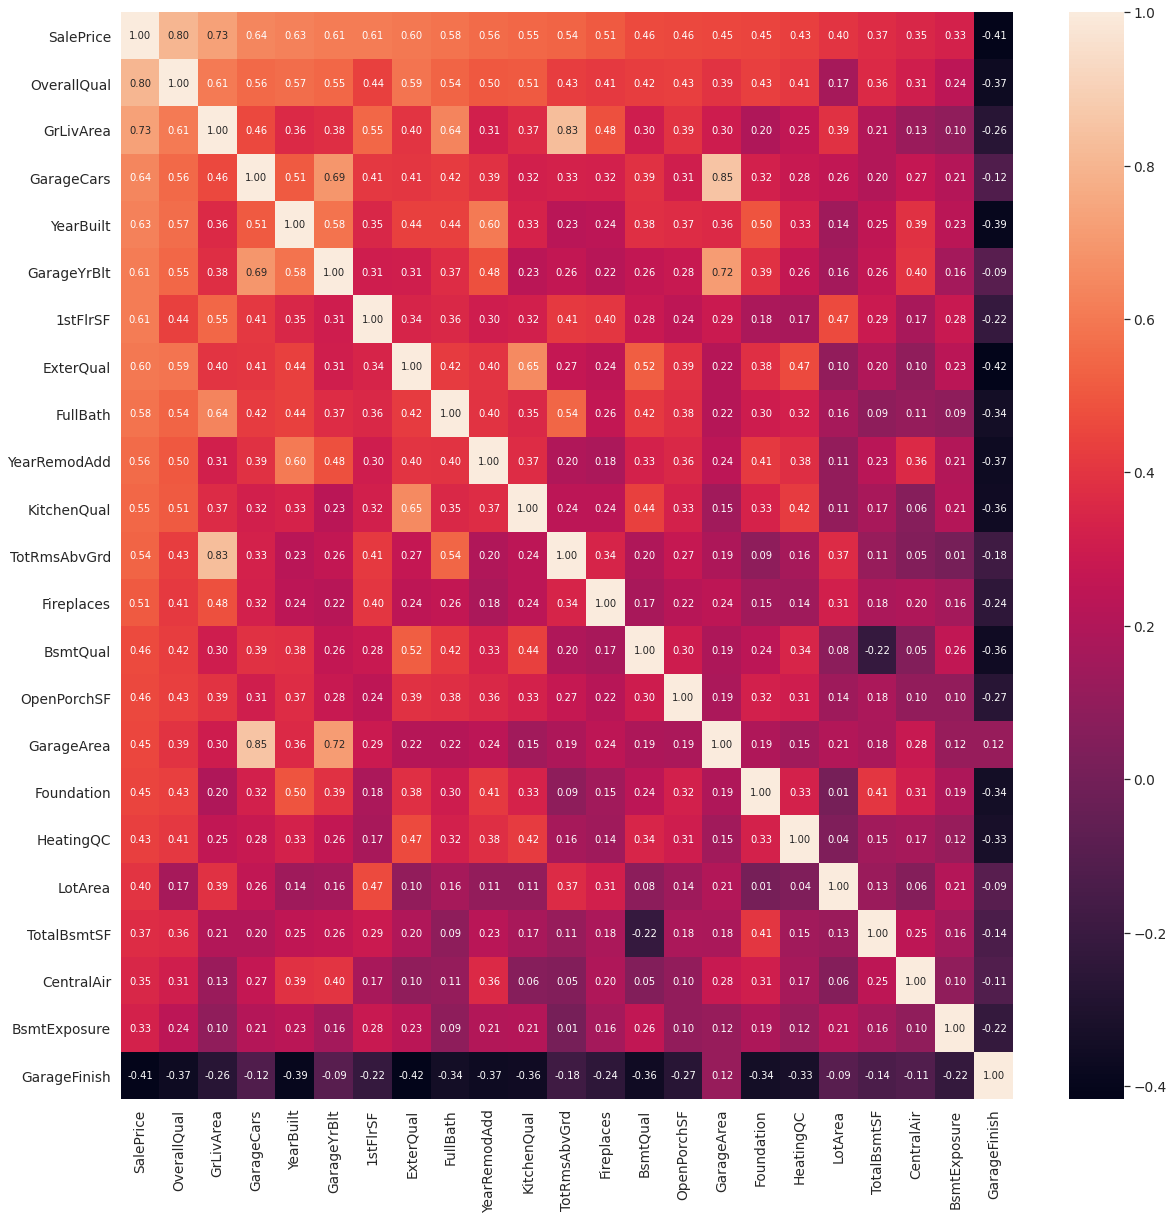

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
corrmat = final_train_Logdata.corr()
k =23
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(final_train_Logdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
final_train_Logdata.columns

Index(['SalePrice', 'ExterQual', 'BsmtFinSF1', 'OverallQual', 'GrLivArea',
       'YearBuilt', 'Foundation', 'TotalBsmtSF', 'GarageCars', 'Fireplaces',
       'KitchenQual', 'OpenPorchSF', 'GarageFinish', '1stFlrSF', 'CentralAir',
       'BsmtQual', 'GarageYrBlt', 'BsmtExposure', 'FullBath', 'YearRemodAdd',
       'TotRmsAbvGrd', '2ndFlrSF', 'OverallCond', 'LotArea', 'MSZoning',
       'GarageArea', 'HeatingQC'],
      dtype='object')

In [ ]:
cols

Index(['SalePrice', 'AllQual', 'Area', 'Year', 'Room', 'Heat', 'Bstm',
       'CentralAir', 'GarageFinish'],
      dtype='object')

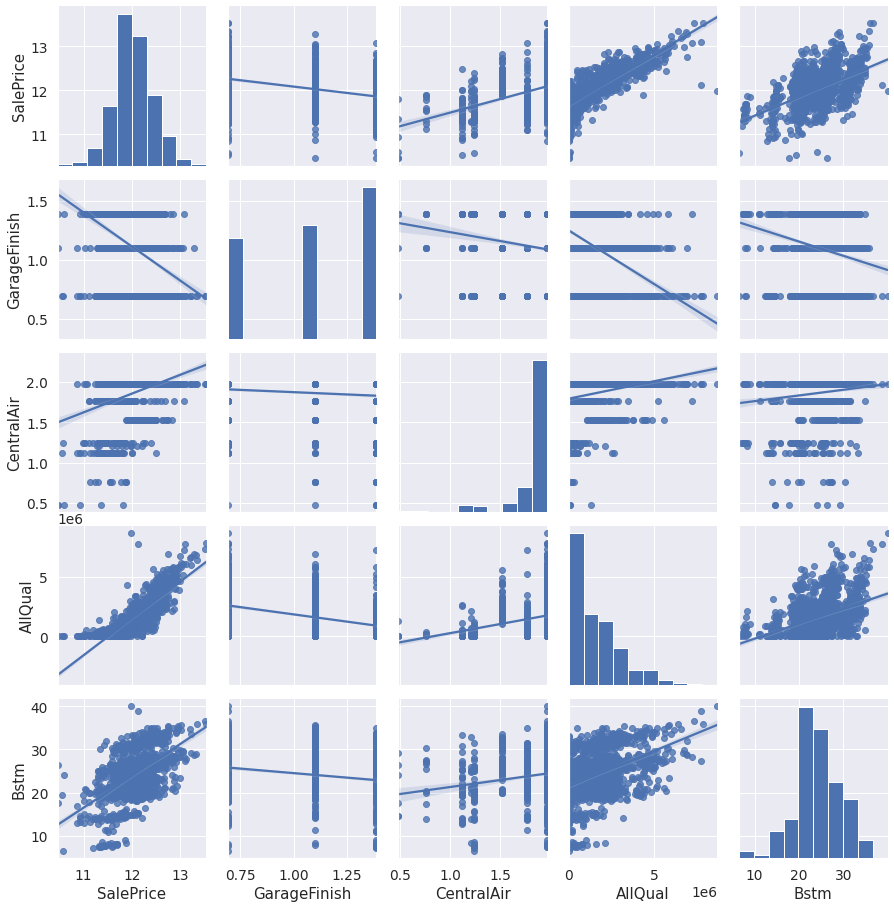

In [ ]:
sns.pairplot(final_train_Logdata,kind="reg")

In [ ]:
final_train_Logdata.columns

Index(['SalePrice', 'GarageFinish', 'CentralAir', 'AllQual', 'Bstm'], dtype='object')

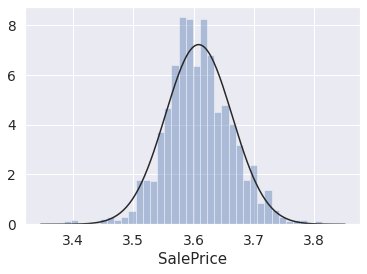

In [99]:
from scipy.stats import norm
ax = sns.distplot(train_sqr_data['SalePrice'], fit=norm, kde=False)

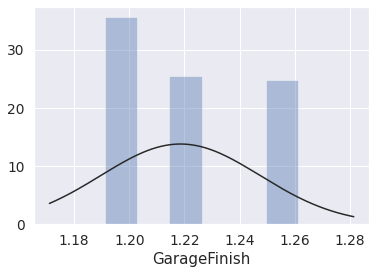

In [100]:
from scipy.stats import norm
ax = sns.distplot(train_sqr_data['GarageFinish'], fit=norm, kde=False)

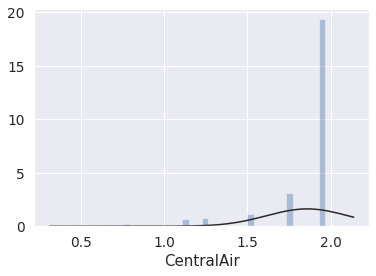

In [ ]:
from scipy.stats import norm
ax = sns.distplot(final_train_Logdata['CentralAir'], fit=norm, kde=False)

In [101]:
from scipy.stats import norm
ax = sns.distplot(final_train_Logdata['AllQual'], fit=norm, kde=False)

KeyError: ignored

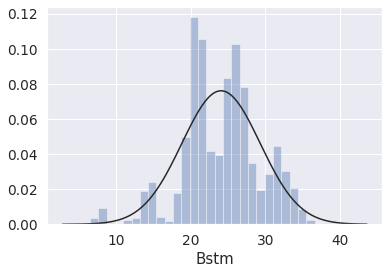

In [ ]:
from scipy.stats import norm
ax = sns.distplot(final_train_Logdata['Bstm'], fit=norm, kde=False)

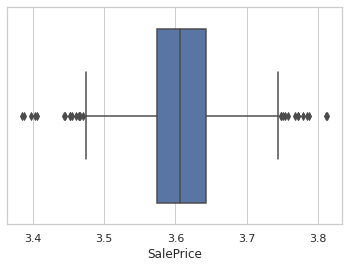

In [102]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_sqr_data["SalePrice"])

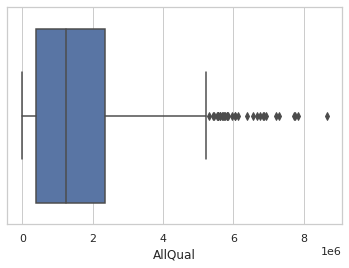

In [ ]:
ax = sns.boxplot(x=final_train_Logdata["AllQual"])

In [ ]:
train= final_train_Logdata.copy()

In [ ]:
z = np.abs(stats.zscore(train))
train = train[(z < 2.5).all(axis=1)]

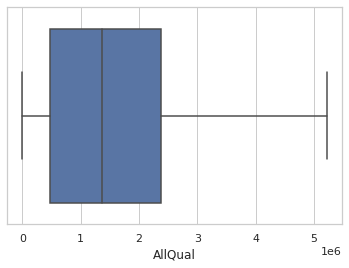

In [ ]:
ax = sns.boxplot(x=train["AllQual"])

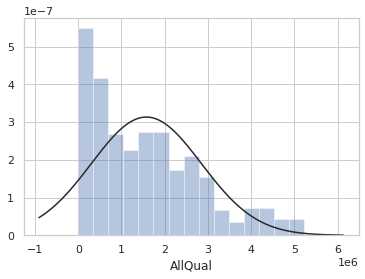

In [ ]:
ax = sns.distplot(train['AllQual'], fit=norm, kde=False)

In [201]:
y = train_box_data['SalePrice']
train = train_box_data.drop(['SalePrice'],axis = 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(train)
train1 = scaler.transform(train)
#scaler.fit(test)
#test = scaler.transform(test)

In [202]:
y1 = np.asarray(y)
y1 = y1.reshape(-1,1)
scaler.fit(y1)
y1 = scaler.transform(y1)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(train, y1, test_size=0.2, random_state=1)

In [204]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
res = regressor.score(X_train, y_train)
print(res*100)
y_pred = regressor.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse
# 34 features
#81.11211900041317
#32908.83108668875

# 25 features
80.0038442074204
32692.370436137197

76.47136854678972


32692.370436137197

In [205]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [208]:
passref = PassiveAggressiveRegressor(max_iter=100000,early_stopping=False,n_iter_no_change=100,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

-0.02719444052825537


1.1350390432925548

In [80]:
y_pred = regressor.predict(test_log_data)
y_pred = np.exp(y_pred)
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/ur1.csv", index=False)

In [54]:
train_log_data.shape

(1460, 74)

In [59]:
test_data['Utilities'] = test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])

In [61]:
test_log_data['Utilities'] = test_data['Utilities']

In [64]:
test_log_data.loc[test_log_data['Utilities'] == 'AllPub', 'Utilities'] = 1

In [72]:
train_log_data.head(2)

MSSubClass  MSZoning   LotArea  ...  GarageFinish  GarageQual  GarageCond
0    4.110874  1.791759  9.042040  ...      0.693147    1.098612    1.098612
1    3.044522  1.791759  9.169623  ...      0.693147    1.098612    1.098612

[2 rows x 74 columns]

In [73]:
test_log_data.head(2)

MSSubClass   LotArea    Street  ...  SaleType  Exterior  Utilities
0    3.044522  9.360741  1.098612  ...  2.302585  0.693147          1
1    3.044522  9.565775  1.098612  ...  2.302585  0.693147          1

[2 rows x 73 columns]

In [70]:
train_log_data.shape

(1460, 74)

In [ ]:
train_log_data.Ex

In [67]:
a = list(train_log_data.columns)
b = list(test_log_data.columns)
for i in b:
  if i not in a:
    print(i)

Exterior1st
Exterior2nd


In [68]:
test_log_data = test_log_data.drop(['Exterior1st','Exterior2nd'],axis =1)

In [ ]:
X_test.shape

(292, 22)

In [ ]:

# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X_train,X_test
#trainy, testy = y_train,y_test
trainy = np.array(y_train)
testy = np.array(y_test)
# reshape 1d arrays to 2d arrays
trainy = trainy #.reshape(len(trainy), 1)
testy = testy #.reshape(len(testy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
#scaler.fit(trainy)
# transform training dataset
#trainy = scaler.transform(trainy)
# transform test dataset
#testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(22, input_dim=15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % ((train_mse), (test_mse)))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

ValueError: ignored

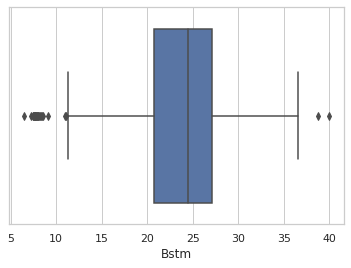

In [ ]:
 #'GarageFinish', 'CentralAir', 'AllQual', 'Bstm
 #ax = sns.boxplot(x=final_train_Logdata["CentralAir"])
 ax = sns.boxplot(x=final_train_Logdata["Bstm"])

In [ ]:
t = final_train_Logdata['AllQual'] * final_train_Logdata['Area'] * final_train_Logdata['Year'] * final_train_Logdata['Room'] * final_train_Logdata['Heat']
print(final_train_Logdata['SalePrice'].corr(t))

0.8452282302686882


In [ ]:
'''
t = final_train_Logdata['ExterQual'] + final_train_Logdata['OverallQual'] + final_train_Logdata['KitchenQual'] + final_train_Logdata['BsmtQual'] + final_train_Logdata['OverallCond'] 
t1 = final_train_Logdata['KitchenAbvGr'] + final_train_Logdata['TotRmsAbvGrd'] + final_train_Logdata['FullBath'] 
t2 = final_train_Logdata['GarageArea'] * final_train_Logdata['LotArea'] * final_train_Logdata['GarageCars'] * final_train_Logdata['GrLivArea'] 
t3 = final_train_Logdata['YearBuilt'] * final_train_Logdata['GarageYrBlt'] * final_train_Logdata['YearRemodAdd'] + final_train_Logdata['Foundation']
t4 = final_train_Logdata['BsmtFinSF1'] + final_train_Logdata['TotalBsmtSF'] + final_train_Logdata['1stFlrSF'] + final_train_Logdata['BsmtExposure'] + final_train_Logdata['2ndFlrSF'] + final_train_Logdata['OpenPorchSF'] 
t6 = final_train_Logdata['HeatingQC'] + final_train_Logdata['Fireplaces'] 
print(final_train_Logdata['SalePrice'].corr(t))
'''

In [ ]:
'''
t = final_train_Logdata['ExterQual'] + final_train_Logdata['OverallQual'] + final_train_Logdata['KitchenQual'] + final_train_Logdata['BsmtQual'] + final_train_Logdata['OverallCond'] 
tlog = np.log(train_log_data['BsmtFinSF1'] + train_log_data['BsmtFinSF2'])
print(train_log_data['BsmtFinSF1'].corr(train_log_data['BsmtFinSF2']))
print(train_log_data['SalePrice'].corr(train_log_data['BsmtFinSF1']))
print(train_log_data['SalePrice'].corr(train_log_data['BsmtFinSF2']))
print(train_log_data['SalePrice'].corr(t))
print(train_log_data['SalePrice'].corr(tlog))
'''

In [ ]:
li = ['aa','bb','aa']
print(set(li))

In [ ]:
c = 0
#for i in range(len(cols)):
  #print(cols[i])
col = []
for j in range(74):
  if abs(cm[0][j]) >= .4:
  #if cm[0][j] >= 0.5 or cm[0][j] <= -0.5:
    #print(cols[j],' ',cm[0][j])
    #c+=1
    col.append(cols[j])
print(col)

In [ ]:
new_log_train = train_log_data.filter(col,axis = 1)
new_log_train

In [ ]:
train_log_data = train_log_data.drop(['OverallCond','ExterCond','','','','','','','','','',],axis = 1)